# AC290 Extreme Computing: Project-based High Performance Distributed and Parallel Systems

In [1]:
import findspark
import os
findspark.init()
import pyspark
sc = pyspark.SparkContext()

In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction to Apache Spark

![Alt apache spark](img/spark-logo.png)

Apache Spark is an open source cloud computing framework that was original developed in AMPLab at UC Berkley and later donated to Apache Software Foundation. By loading data into cluster's memory's, Spark is able to achieve nearly 100x speed up compared to MapReduce for certain applications.

Spark provides API in Java, Scala, Python and R, and it's Python API is called **pyspark**. For our course, we will use pyspark.

### Basics

The basic unit of data abstraction in Spark is *Resilient Distributed Dataset (RDD)*, which is a collection of data partitioned across across multiple machines in the cluster.  There are two ways to create RDDs: parallelizing existing iterable or collections in Python or referencing external storage file. 

In [3]:
# parallelize
myArray = [1.0, 2.5, 3.0, 4.0]
myRDD = sc.parallelize(myArray)
myRDD

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:391

Another method is to read in external storage file.  In the example below, we'll read in a textfile.  

In [4]:
# textFile
textRDD = sc.textFile('data/adventures_of_huckleberry_finn.txt')
textRDD.collect()

[u'',
 u'',
 u'The Project Gutenberg EBook of Adventures of Huckleberry Finn, Complete',
 u'by Mark Twain (Samuel Clemens)',
 u'',
 u'This eBook is for the use of anyone anywhere at no cost and with almost',
 u'no restrictions whatsoever. You may copy it, give it away or re-use',
 u'it under the terms of the Project Gutenberg License included with this',
 u'eBook or online at www.gutenberg.net',
 u'',
 u'Title: Adventures of Huckleberry Finn, Complete',
 u'',
 u'Author: Mark Twain (Samuel Clemens)',
 u'',
 u'Release Date: August 20, 2006 [EBook #76]',
 u'',
 u'Last Updated: April 18, 2015]',
 u'',
 u'Language: English',
 u'',
 u'',
 u'*** START OF THIS PROJECT GUTENBERG EBOOK HUCKLEBERRY FINN ***',
 u'',
 u'Produced by David Widger',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'ADVENTURES',
 u'',
 u'OF',
 u'',
 u'HUCKLEBERRY FINN',
 u'',
 u"(Tom Sawyer's Comrade)",
 u'',
 u'By Mark Twain',
 u'',
 u'Complete',
 u'',
 u'',
 u'',
 u'',
 u'CONTENTS.',
 u'',
 u'CHAPTER I. Civilizing Huck.--Miss Watson.

Spark can also create RDDs from other data storage sources including Hadoop, Amazon S3, etc.  In addition, when creating a list of integers, you can use *range* method as a shortcut.

In [5]:
# range
rangeRDD = sc.range(0,100,1)
rangeRDD.collect()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [6]:
# count
rangeRDD.count()

100

In [7]:
# first
rangeRDD.first()

0

In [8]:
# take 10 elements
rangeRDD.take(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Use *sample* method to randomly select elements from RDD.

In [9]:
# sample(replacement, fraction, seed=None)
rangeRDD.sample(False, 0.1).collect()

[0, 19, 33, 44, 63, 67, 79, 81]

Similar to Python's built-in *map* function, RDD *map* method transforms every element of a RDD using a specified function. It returns a new RDD.

In [10]:
# square the elements
myRDD2 = myRDD.map(lambda x: x*x)

print myRDD.collect()
print myRDD2.collect()

[1.0, 2.5, 3.0, 4.0]
[1.0, 6.25, 9.0, 16.0]


In [11]:
# reduce
myRDD.reduce(lambda a,b: a+b)

10.5

In [12]:
# filter
evenRDD = rangeRDD.filter(lambda x: x % 2 == 0)
print evenRDD.collect()

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


Consider the following RDD:

In [13]:
numArray = [1,2,3,4,5]
numRDD = sc.parallelize(numArray)

listRDD = numRDD.map(lambda x: [x]*x)
listRDD.collect()

[[1], [2, 2], [3, 3, 3], [4, 4, 4, 4], [5, 5, 5, 5, 5]]

What if you want to flatten the list of list RDD?  Use *flatMap* method.  

In [14]:
flatRDD = numRDD.flatMap(lambda x: [x]*x)
flatRDD.collect()

[1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

Often you will have to work with pair RDD where each element is a tuple of key and value pair.  In such a case, use *groupByKey* and *mapValues*.

In [15]:
# groupByKey
keyRDD = sc.parallelize([('a',1),('b',1),('a',1),('c',2)])

print keyRDD.groupByKey().mapValues(lambda x: sum(x)).collect()
print keyRDD.groupByKey().mapValues(list).collect()

[('a', 2), ('c', 2), ('b', 1)]
[('a', [1, 1]), ('c', [2]), ('b', [1])]


These are only some of the frequently used functions in pyspark.  Refer to [pyspark documentation](https://spark.apache.org/docs/latest/api/python/pyspark.html) for more examples.

### Example: Estimating $\pi$

Let's use Spark to calculate estimation of Pi using Monte Carlo simulation.  

Imagine that we throw 1 million sand particles into a unit square box.  We count up the number of sands that land within the area of $x^2 + y^2$ and divide this figure by 1 million.  Multiply our result by four, we arrive at the estimation of $\pi$.

![Alt estimate Pi](img/estimate_pi.gif)

In [16]:
# Function to sample a point
def sample(d):  # Ignore d
    x = np.random.uniform(); y = np.random.uniform();
    return x*x + y*y < 1.

In [17]:
import time
N = int(1e6)
start = time.time()
total = sc.range(0,N,1).map(sample).reduce(lambda a,b: a+b)
print "Pi estimate:", (total / float(N) * 4)
print "Duration: %.5f Seconds" % (time.time() - start)

Pi estimate: 3.141056
Duration: 1.59289 Seconds


In [18]:
print "Numpy Estimate:", np.pi

Numpy Estimate: 3.14159265359


Our estimate is fairly close to the Numpy's $\pi$.  However, if we increase the number of samples, we can achieve even greater accuracy at the cost of run time.  Can you think of a way to perform this estimation faster?

### Example: Word Count

Next, we'll use Spark to examine the total number of unique words in large volume of English texts.  We included 10 representative English classical literatures from [Project Gutenberg](https://www.gutenberg.org/ "Title").  The text files are already saved in 'data' directory.

In [19]:
import os
os.listdir('data')

['adventures_of_huckleberry_finn.txt',
 'adventures_of_sherlock_holmes.txt',
 'adventures_of_tom_sawyer.txt',
 'alices_adventures_in_wonderland.txt',
 'emma.txt',
 'frankenstein.txt',
 'great_expectations.txt',
 'moby_dick.txt',
 'pride_and_prejudice.txt',
 'tale_of_two_cities.txt']

#### Parse a Line

We'll begin the process by building a function that will parse of long string of text into individual words.  This function must also eliminate any punctuations including "," and ".".  In addition, all of the words must be in lowercase characters so that for example, "Bank" and "bank" are not captured as separate words.

In [20]:
import re

def parsewords(sentence):
    sentence_clean = re.sub(r'([^A-Za-z0-9\s+])', '', sentence)
    words = sentence_clean.split(' ')
    return [word.lower() for word in words if word != ''] # Convert to lowercase and eliminate empty string words

Let's test out this function using a test string.

In [21]:
test = "Alice was beginning to get very tired of sitting by her sister on the \
bank, and of having nothing to do: once or twice she had peeped into the \
book her sister was reading, but it had no pictures or conversations in \
it, 'and what is the use of a book,' thought Alice 'without pictures or \
conversations?'"

In [22]:
parsewords(test)

['alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 'thought',
 'alice',
 'without',
 'pictures',
 'or',
 'conversations']

#### Load Text Files

Next, we'll load up the text files and create a text file RDD.

In [23]:
textsRDD = sc.textFile('data/'+os.listdir('data')[0])
for txt in os.listdir('data')[1:]:
    file_dir = 'data/' + txt
    textRDD = sc.textFile(file_dir)
    textsRDD = textsRDD.union(textRDD)

In [24]:
textsRDD.collect()

[u'',
 u'',
 u'The Project Gutenberg EBook of Adventures of Huckleberry Finn, Complete',
 u'by Mark Twain (Samuel Clemens)',
 u'',
 u'This eBook is for the use of anyone anywhere at no cost and with almost',
 u'no restrictions whatsoever. You may copy it, give it away or re-use',
 u'it under the terms of the Project Gutenberg License included with this',
 u'eBook or online at www.gutenberg.net',
 u'',
 u'Title: Adventures of Huckleberry Finn, Complete',
 u'',
 u'Author: Mark Twain (Samuel Clemens)',
 u'',
 u'Release Date: August 20, 2006 [EBook #76]',
 u'',
 u'Last Updated: April 18, 2015]',
 u'',
 u'Language: English',
 u'',
 u'',
 u'*** START OF THIS PROJECT GUTENBERG EBOOK HUCKLEBERRY FINN ***',
 u'',
 u'Produced by David Widger',
 u'',
 u'',
 u'',
 u'',
 u'',
 u'ADVENTURES',
 u'',
 u'OF',
 u'',
 u'HUCKLEBERRY FINN',
 u'',
 u"(Tom Sawyer's Comrade)",
 u'',
 u'By Mark Twain',
 u'',
 u'Complete',
 u'',
 u'',
 u'',
 u'',
 u'CONTENTS.',
 u'',
 u'CHAPTER I. Civilizing Huck.--Miss Watson.

We have a a RDD that is a collection of lines.

We'll use flatMap method and apply parsewords function to create a new RDD of words. 

In [25]:
wordRDD = textsRDD.flatMap(parsewords)
wordRDD.collect()

[u'the',
 u'project',
 u'gutenberg',
 u'ebook',
 u'of',
 u'adventures',
 u'of',
 u'huckleberry',
 u'finn',
 u'complete',
 u'by',
 u'mark',
 u'twain',
 u'samuel',
 u'clemens',
 u'this',
 u'ebook',
 u'is',
 u'for',
 u'the',
 u'use',
 u'of',
 u'anyone',
 u'anywhere',
 u'at',
 u'no',
 u'cost',
 u'and',
 u'with',
 u'almost',
 u'no',
 u'restrictions',
 u'whatsoever',
 u'you',
 u'may',
 u'copy',
 u'it',
 u'give',
 u'it',
 u'away',
 u'or',
 u'reuse',
 u'it',
 u'under',
 u'the',
 u'terms',
 u'of',
 u'the',
 u'project',
 u'gutenberg',
 u'license',
 u'included',
 u'with',
 u'this',
 u'ebook',
 u'or',
 u'online',
 u'at',
 u'wwwgutenbergnet',
 u'title',
 u'adventures',
 u'of',
 u'huckleberry',
 u'finn',
 u'complete',
 u'author',
 u'mark',
 u'twain',
 u'samuel',
 u'clemens',
 u'release',
 u'date',
 u'august',
 u'20',
 u'2006',
 u'ebook',
 u'76',
 u'last',
 u'updated',
 u'april',
 u'18',
 u'2015',
 u'language',
 u'english',
 u'start',
 u'of',
 u'this',
 u'project',
 u'gutenberg',
 u'ebook',
 u'huckle

Use map to keep count of each word's occurance. 

In [26]:
# Convert individual word into a pair of (word,1) tuple 
wordPairRDD = wordRDD.map(lambda word: (word,1))
wordPairRDD.collect()

[(u'the', 1),
 (u'project', 1),
 (u'gutenberg', 1),
 (u'ebook', 1),
 (u'of', 1),
 (u'adventures', 1),
 (u'of', 1),
 (u'huckleberry', 1),
 (u'finn', 1),
 (u'complete', 1),
 (u'by', 1),
 (u'mark', 1),
 (u'twain', 1),
 (u'samuel', 1),
 (u'clemens', 1),
 (u'this', 1),
 (u'ebook', 1),
 (u'is', 1),
 (u'for', 1),
 (u'the', 1),
 (u'use', 1),
 (u'of', 1),
 (u'anyone', 1),
 (u'anywhere', 1),
 (u'at', 1),
 (u'no', 1),
 (u'cost', 1),
 (u'and', 1),
 (u'with', 1),
 (u'almost', 1),
 (u'no', 1),
 (u'restrictions', 1),
 (u'whatsoever', 1),
 (u'you', 1),
 (u'may', 1),
 (u'copy', 1),
 (u'it', 1),
 (u'give', 1),
 (u'it', 1),
 (u'away', 1),
 (u'or', 1),
 (u'reuse', 1),
 (u'it', 1),
 (u'under', 1),
 (u'the', 1),
 (u'terms', 1),
 (u'of', 1),
 (u'the', 1),
 (u'project', 1),
 (u'gutenberg', 1),
 (u'license', 1),
 (u'included', 1),
 (u'with', 1),
 (u'this', 1),
 (u'ebook', 1),
 (u'or', 1),
 (u'online', 1),
 (u'at', 1),
 (u'wwwgutenbergnet', 1),
 (u'title', 1),
 (u'adventures', 1),
 (u'of', 1),
 (u'huckleberry',

Finally, use reduceByKey method to sum up the counts. 

In [27]:
# import add function
wordCountRDD = wordPairRDD.reduceByKey(lambda x,y: x+y)
wordCountRDD.collect()

[(u'four', 305),
 (u'outcries', 1),
 (u'mansion', 8),
 (u'saved', 63),
 (u'lory', 7),
 (u'paris', 80),
 (u'apostrophising', 1),
 (u'blackholes', 1),
 (u'painters', 2),
 (u'betwisk', 1),
 (u'regalia', 3),
 (u'alternating', 6),
 (u'thenstill', 1),
 (u'hawkingjust', 1),
 (u'aroun', 7),
 (u'lurk', 6),
 (u'tantalizing', 3),
 (u'goodhumored', 1),
 (u'waterlogged', 1),
 (u'joethats', 1),
 (u'plastertied', 1),
 (u'internally', 1),
 (u'westsothats', 1),
 (u'frankness', 5),
 (u'companies', 9),
 (u'wards', 3),
 (u'weret', 1),
 (u'cassock', 2),
 (u'crossquestioned', 2),
 (u'glued', 3),
 (u'midsummer', 6),
 (u'request', 55),
 (u'pilothouse', 2),
 (u'plaudits', 1),
 (u'wellgrown', 4),
 (u'7th', 5),
 (u'billets', 2),
 (u'saidmuch', 1),
 (u'blue', 164),
 (u'lesser', 2),
 (u'childrenat', 1),
 (u'heartor', 2),
 (u'javelins', 2),
 (u'neat', 34),
 (u'asis', 10),
 (u'barometer', 1),
 (u'mei', 17),
 (u'thrash', 2),
 (u'china', 21),
 (u'fissures', 1),
 (u'106', 1),
 (u'doubleladen', 1),
 (u'remittances', 1),

In [28]:
# Select Top 50 words in descending order of frequency
top50Words = wordCountRDD.takeOrdered(50, key=lambda x: -x[1])

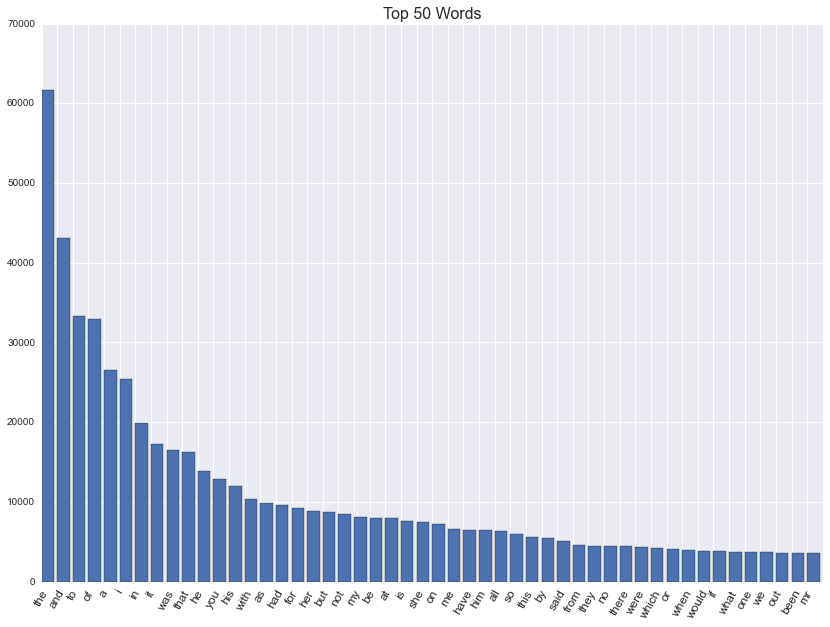

In [29]:
words = list()
counts = list()
for pair in top50Words:
    words.append(pair[0])
    counts.append(pair[1])

plt.figure(figsize=(14,10))
plt.bar(range(50), counts[:50])
plt.xticks(range(50), words[:50], rotation=60, fontsize=12)
plt.title("Top 50 Words",fontsize=16)
plt.show()

"the" is the most frequently used words in our sample of texts followed by "and".  

Note that the frequency of the words approximately follow [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law "Zipf's Law"), which states that the frequency of any word is inversely proportional to its rank in the frequency.

For those who are proficient in another language besides English, we encourage you to perform this exercise in your language and share the result with your classmates.  